# setup

In [1]:
# plotting
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from matplotlib import pyplot as plt
from IPython.display import clear_output
from IPython.html.widgets import interact

plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams['axes.facecolor'] = (1, 1, 1)
plt.rcParams['xtick.direction'] = 'out'                                                                              
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Droid Sans']
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['figure.max_open_warning'] = 40
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
import glm
import simulation
from common import *

# 1D example

## source data

In [3]:
data = simulation.SimulatedData( N_sec=4 )

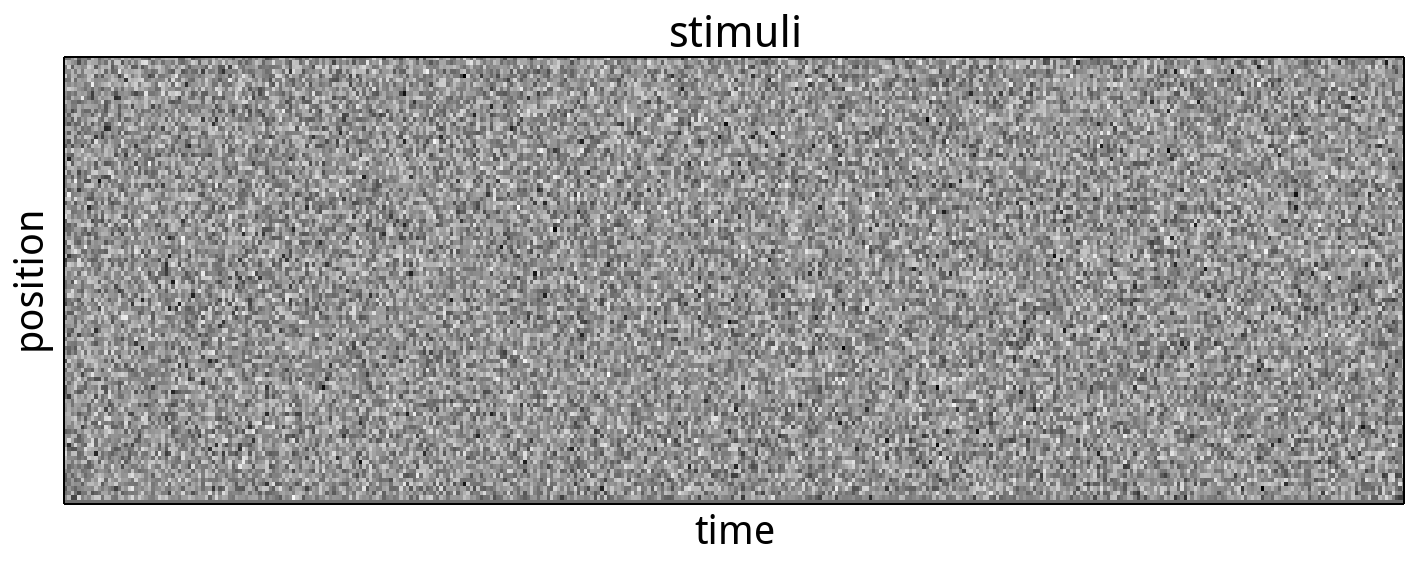

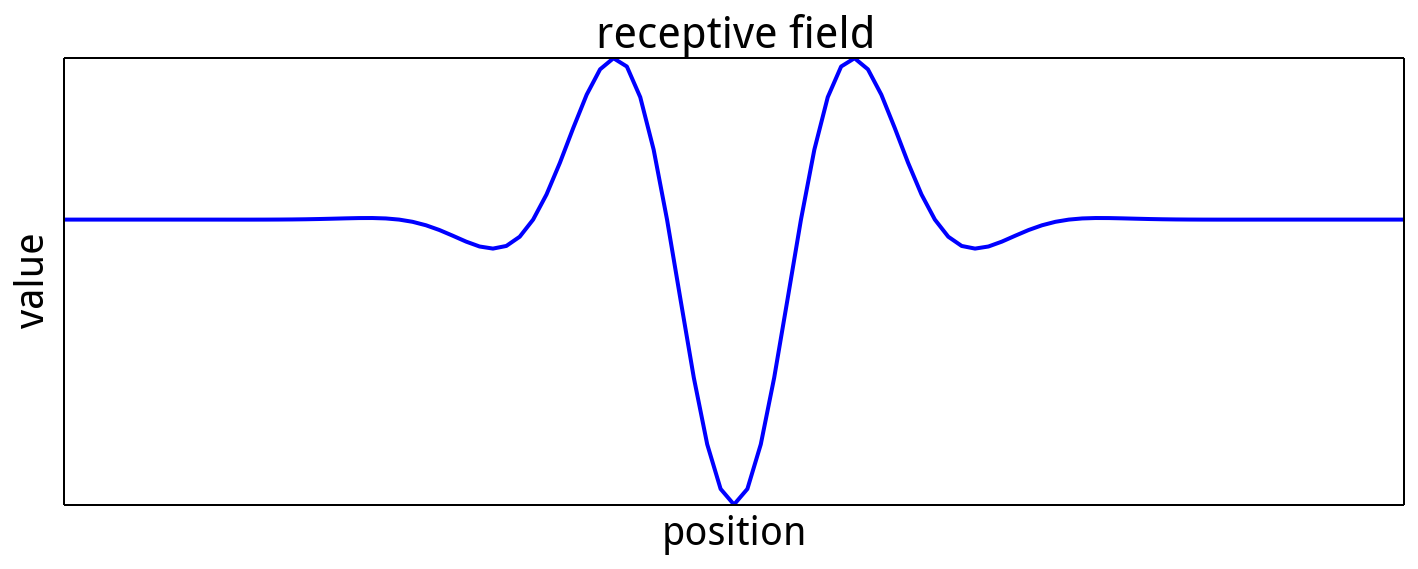

In [4]:
# plot stimuli
fig = plt.figure()
ax = fig.gca( xlabel='time', ylabel='position', xticks=[], yticks=[], title='stimuli' )
ax.imshow( data.X__td.T, cmap=plt.cm.Greys )

# plot receptive field
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='receptive field' )
ax.plot( data.k_stim_true, lw=2 )
pass

## solving

In [5]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

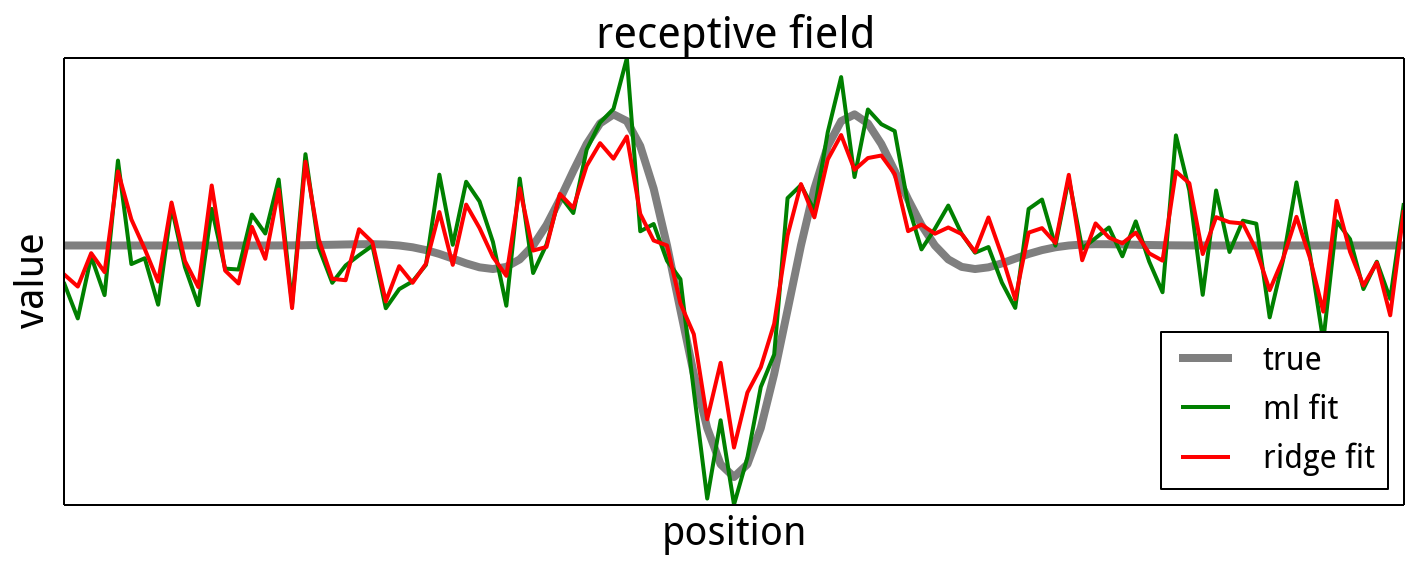

In [6]:
# plot receptive fields
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='receptive field' )
ax.plot( data.k_stim_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[:-1], color='r', lw=2, label='ridge fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

In [7]:
# ML overfits to the training data, makes poorer predictions on the testing data
print 'training: %.3f' % (ridge.LL_training_per_observation - ml.LL_training_per_observation)
print 'testing:  %.3f' % (ridge.LL_testing_per_observation - ml.LL_testing_per_observation)

training: -0.029
testing:  0.068


# 2D example

## source data

In [8]:
# construct class
class SimulatedData2D( simulation.SimulatedData ):
    
    def make_k_stim_true( self ):
        """ Generate stimulus-response relationship for simulation. """
        # dimensions
        self.D_x = D_x = 10
        self.D_y = D_y = 10
        self.D = D = D_x * D_y + 1 
        # create kernel
        i, j = np.meshgrid( np.arange(self.D_x), np.arange(self.D_y), indexing='ij' )
        k_stim_true_2D = np.exp(-0.5 * ((j - 3) ** 2 + (i - 5) ** 2))
        return k_stim_true_2D.flatten()

In [9]:
# instantiate
data = SimulatedData2D( N_sec=4 )

## solving

In [10]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

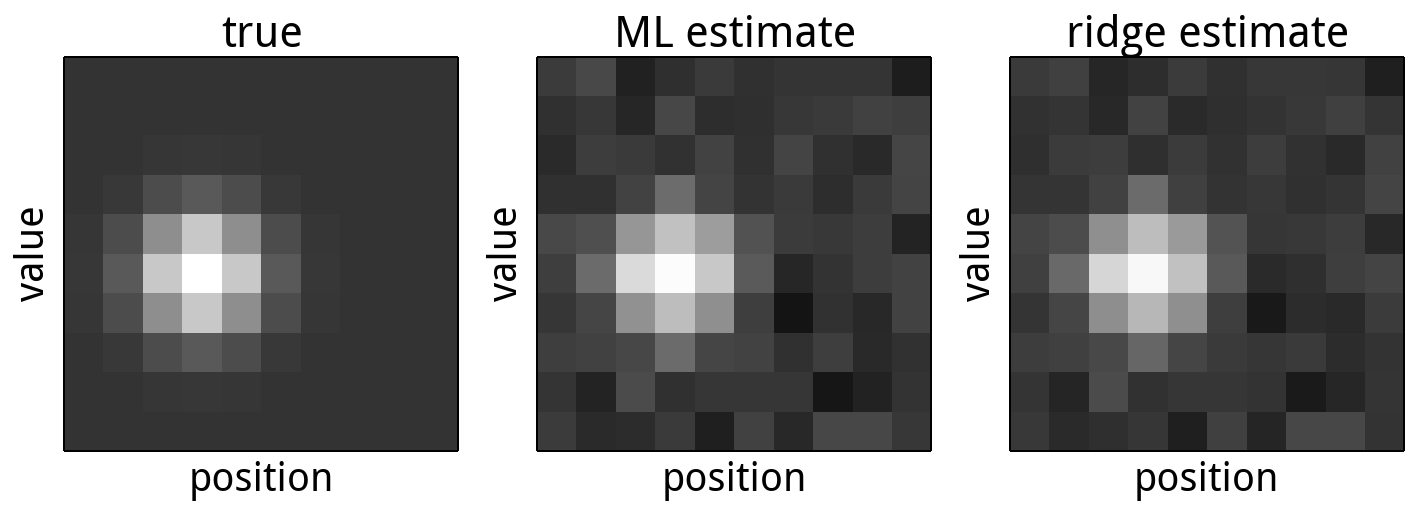

In [11]:
# plot receptive fields
fig = plt.figure()
ax = fig.add_subplot( 1, 3, 1, xlabel='position', ylabel='value', xticks=[], yticks=[], title='true' )
ax.imshow( data.k_stim_true.reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 2, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ML estimate' )
ax.imshow( ml.k__d[:-1].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 3, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ridge estimate' )
ax.imshow( ridge.k__d[:-1].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

pass

In [12]:
# ML overfits to the training data, makes poorer predictions on the testing data
print 'training: %.3f' % (ridge.LL_training_per_observation - ml.LL_training_per_observation)
print 'testing:  %.3f' % (ridge.LL_testing_per_observation - ml.LL_testing_per_observation)

training: -0.005
testing:  0.536


# GLM with history dependence

## source data

In [101]:
class SimulatedData2DHistory( simulation.SimulatedDataHistory, SimulatedData2D ):    
    pass

In [102]:
# instantiate
data = SimulatedData2DHistory( N_sec=60 )

## solving

In [103]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

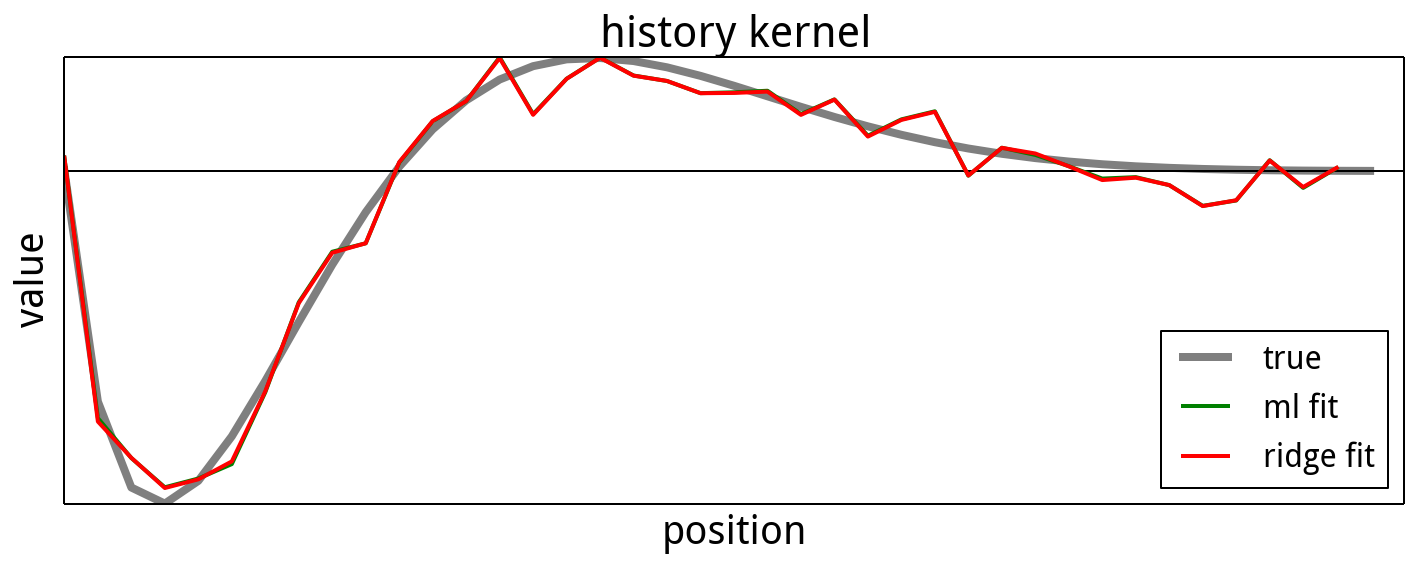

In [104]:
# plot history kernels
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='history kernel' )
ax.plot([0, 40], [0, 0], 'k-')
ax.plot( data.k_history_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[-40:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[-40:-1], color='r', lw=2, label='ridge fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

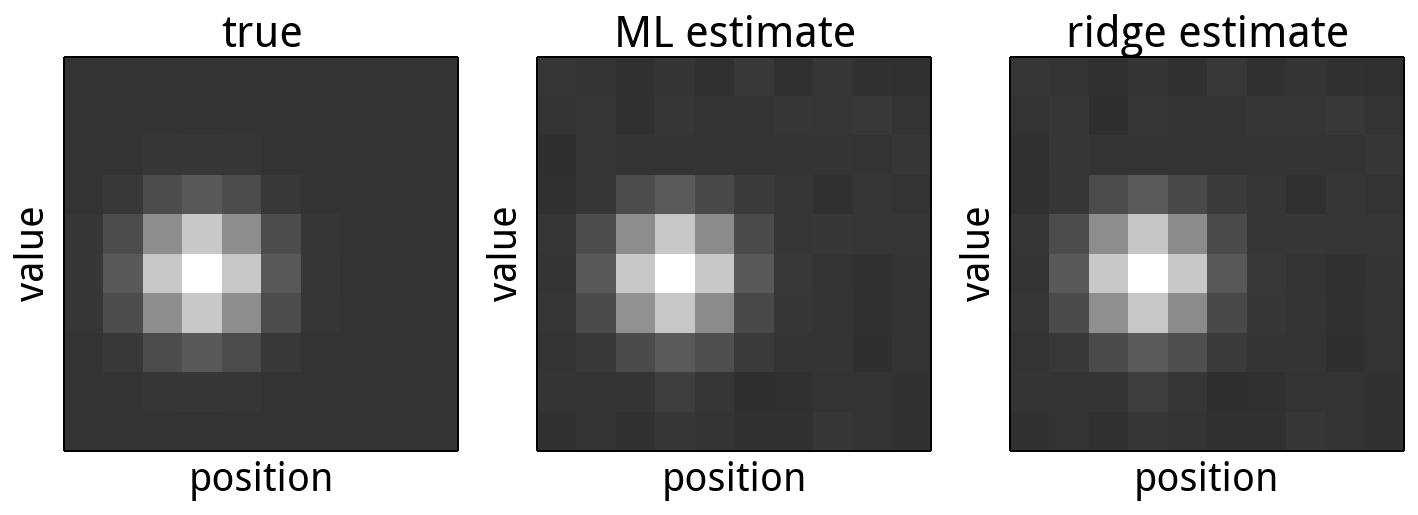

In [19]:
# plot receptive fields
fig = plt.figure()
ax = fig.add_subplot( 1, 3, 1, xlabel='position', ylabel='value', xticks=[], yticks=[], title='true' )
ax.imshow( data.k_true[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 2, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ML estimate' )
ax.imshow( ml.k__d[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 3, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ridge estimate' )
ax.imshow( ridge.k__d[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

pass

## Separate ridge for stim and history

In [20]:
class DoubleRidge( glm.Diagonal_Prior ):
    
    """ Ridge prior on `k`. 
    
    Separate ridge terms for stim-kernel and history-kernel.

    """ 
    
    R_is_identity = True                             
    
    # default variables
    hyperparameter_names = [ 'rho_stim', 'rho_history' ]
    bounds_theta = [ (-15, 15), (-15, 15) ]
    default_theta0 = [0., 0.]
        
    grid_search_theta_parameters = { 
            'bounds':[ [ -14, 14 ], [-14, 14] ],
            'spacing': [ 'linear', 'linear' ],
            'initial': A([ 0., 0. ]),
            'strategy': '1D two pass',  
            'grid_size': (10, 10) }
    
    """ Prior on `k` """
    
    @cached
    def l__d( theta, data ):
        """ Diagonal of prior covariance matrix for `k`. """
        rho_stim, rho_history = theta
        return np.concatenate([ 
                exp( -rho_stim ) * ones( data.D_stim ),
                exp( -rho_history ) * ones( data.D_history ),
                [1.] ])
    
    @cached
    def dl_dtheta__id( theta, data ):
        """ Derivative of the diagonal prior covariance matrix. """
        rho_stim, rho_history = theta
        dl_drho_stim = np.concatenate([ 
                -exp( -rho_stim ) * ones( data.D_stim ),
                zeros( data.D_history + 1 ) ])
        dl_drho_history = np.concatenate([ 
                zeros( data.D_stim ),
                -exp( -rho_history ) * ones( data.D_history ),
                [0] ])
        return [ dl_drho_stim, dl_drho_history ] 

In [21]:
# double ridge penalised solution
double_ridge = DoubleRidge( data, testing_proportion=0.2 )
double_ridge.training_slices = ml.training_slices
double_ridge.testing_slices = ml.testing_slices
double_ridge.solve( verbose=False )

## ALDs prior for history

In [105]:
class ALDs( glm.Diagonal_Prior ):
    
    """ Ridge prior on `k_stim`. ALDs prior on `k_history`. """
        
    R_is_identity = False
    
    # default variables
    hyperparameter_names = [ 'rho_stim', 'log_tstd_history', 'rho_history'  ]
    bounds_theta = [ (-15, 15), (-5, 5), (-15, 15) ]
    default_theta0 = [0., 1., 0.]
        
    grid_search_theta_parameters = { 
            'bounds':[ [ -14, 14 ], [-4.5, 4.5], [-14, 14] ],
            'spacing': [ 'linear', 'linear', 'linear' ],
            'initial': A([ 0., 3., 0. ]),
            'strategy': '1D two pass',  
            'grid_size': (10, 10, 10) }
    
    """ Prior on `k` """
    
    @cached
    def D_stim( data ):
        return data.D_stim
    
    @cached
    def D_history( data ):
        return data.D_history
    
    @cached
    def l__d( theta, D_stim, D_history ):
        """ Diagonal of prior covariance matrix for `k`. """
        # parse input
        rho_stim, log_tstd_history, rho_history = theta
        tstd = exp( log_tstd_history )
        # construct components of the diagonal
        l_stim = exp( -rho_stim ) * ones( D_stim )
        tt = np.arange( D_history, dtype=float )
        l_history = exp( -0.5/(tstd**2) * (tt ** 2) - rho_history )
        l_const = [10.]        
        return np.concatenate([ l_stim, l_history, l_const ])
    
    @cached
    def dl_dtheta__id( theta, D_stim, D_history, l__d ):
        """ Derivative of the diagonal prior covariance matrix. """
        # parse input
        rho_stim, log_tstd_history, rho_history = theta
        tstd = exp( log_tstd_history )
        # construct components of the diagonal
        l_stim = exp( -rho_stim ) * ones( D_stim )
        tt = np.arange( D_history, dtype=float )
        l_history = exp( -0.5/(tstd**2) * (tt ** 2) - rho_history )
        l_const = A([10.])
        # derivative wrt rho_stim
        dl_drho_stim = np.concatenate([ -l_stim, 0*l_history, 0*l_const ])
        # derivative wrt log_tstd_history
        dl_dlog_tstd_history = np.concatenate([
                0*l_stim,
                (tstd ** -2.) * (tt ** 2) * l_history,
                0*l_const ])
        # derivative wrt rho_history
        dl_drho_history = np.concatenate([ 0*l_stim, -l_history, 0*l_const ])
        return A([ dl_drho_stim, dl_dlog_tstd_history, dl_drho_history ])

In [116]:
# double ridge penalised solution
alds = ALDs( data, testing_proportion=0.2 )
#alds.check_l_derivatives()
#alds.check_LP_derivatives()
#alds.check_LE_derivatives()
alds.training_slices = ml.training_slices
alds.testing_slices = ml.testing_slices
alds.solve( verbose=False )

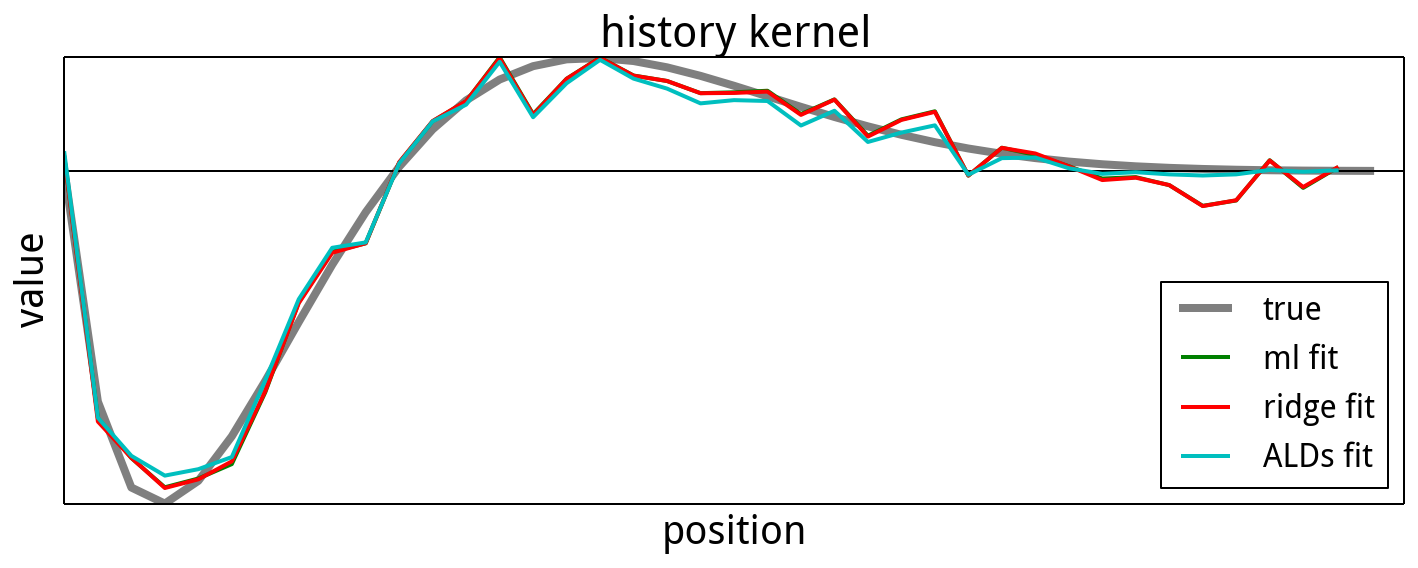

In [118]:
# plot history kernels
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='history kernel' )
ax.plot([0, 40], [0, 0], 'k-')
ax.plot( data.k_history_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[-40:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[-40:-1], color='r', lw=2, label='ridge fit' )
ax.plot( alds.k__d[-40:-1], color='c', lw=2, label='ALDs fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

### with less data

In [122]:
# instantiate
data = SimulatedData2DHistory( N_sec=10 )

# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

# alds solution
alds = ALDs( data, testing_proportion=0.2 )
alds.training_slices = ml.training_slices
alds.testing_slices = ml.testing_slices
alds.solve( verbose=False )

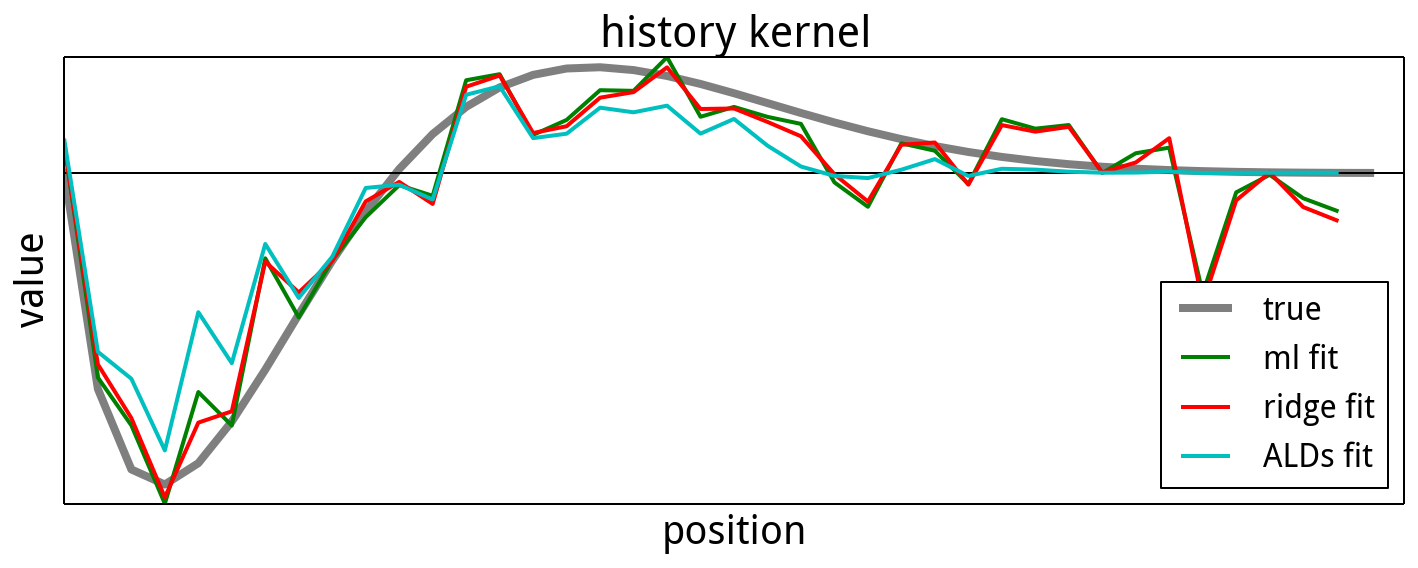

In [123]:
# plot history kernels
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='history kernel' )
ax.plot([0, 40], [0, 0], 'k-')
ax.plot( data.k_history_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[-40:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[-40:-1], color='r', lw=2, label='ridge fit' )
ax.plot( alds.k__d[-40:-1], color='c', lw=2, label='ALDs fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

### showing the posterior estimate

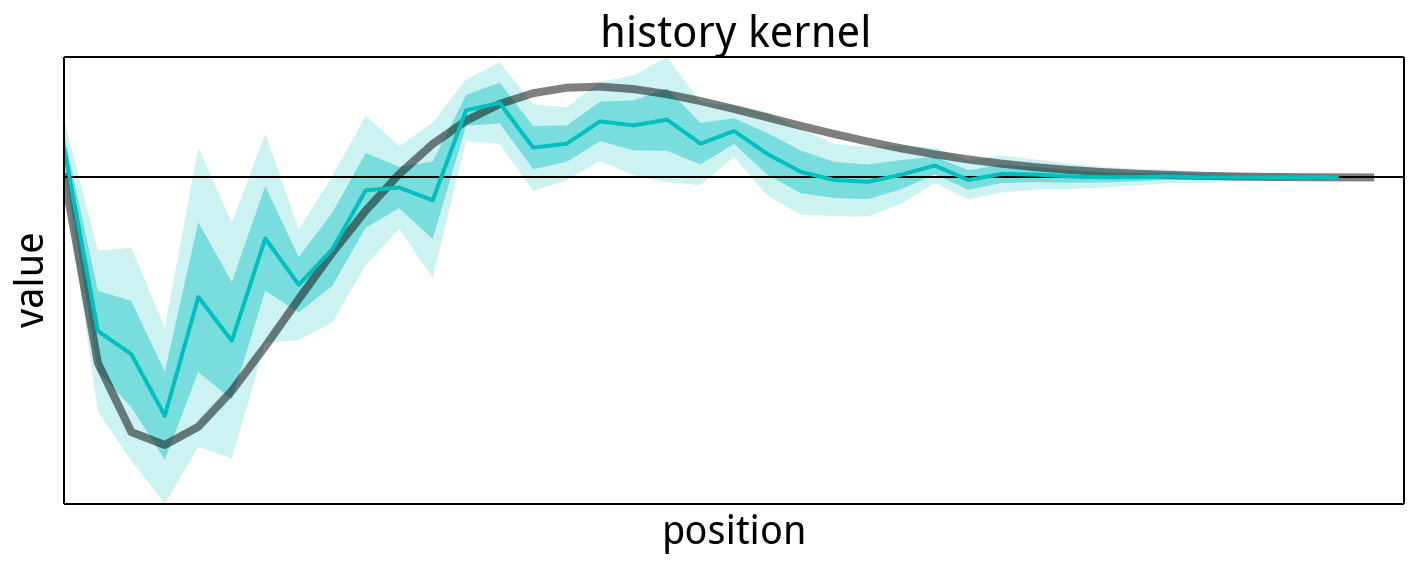

In [150]:
mu = alds.k__d[-40:-1]
cov = alds.posterior.Lambda__dd[-40:-1, -40:-1]
err = np.sqrt( np.diag(cov) )

# plot history kernels
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='history kernel' )
ax.plot([0, 40], [0, 0], 'k-')
ax.plot( data.k_history_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( alds.k__d[-40:-1], color='c', lw=2, label='ALDs fit' )
ax.fill_between( np.arange(39), mu - err*2, mu + err*2, facecolor='c', lw=0, alpha=0.2 )
ax.fill_between( np.arange(39), mu - err*1, mu + err*1, facecolor='c', lw=0, alpha=0.4 )
pass